In [40]:
import pandas as pd;
import matplotlib.pyplot as plt;

In [2]:
sales_data = pd.read_csv("D:\Projects\Sales-analysis\Data\superstore.csv")

In [3]:
sales_data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [9]:
# checking the number of Rows and Columns
sales_data.shape

(51290, 27)

In [10]:
# checking column names and data types
sales_data.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [11]:
# Converting Date columns into proper date format
sales_data['Order.Date']=pd.to_datetime(sales_data['Order.Date'])
sales_data['Ship.Date']=pd.to_datetime(sales_data['Ship.Date'])
print(sales_data.dtypes)

Category                  object
City                      object
Country                   object
Customer.ID               object
Customer.Name             object
Discount                 float64
Market                    object
记录数                        int64
Order.Date        datetime64[ns]
Order.ID                  object
Order.Priority            object
Product.ID                object
Product.Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row.ID                     int64
Sales                      int64
Segment                   object
Ship.Date         datetime64[ns]
Ship.Mode                 object
Shipping.Cost            float64
State                     object
Sub.Category              object
Year                       int64
Market2                   object
weeknum                    int64
dtype: object


In [12]:
# Extracting year and month
sales_data['order_year']=sales_data['Order.Date'].dt.year
sales_data['order_month']=sales_data['Order.Date'].dt.month
sales_data['ship_year']=sales_data['Ship.Date'].dt.year
sales_data['ship_month']=sales_data['Ship.Date'].dt.month

In [18]:
# Checking Missing Values
sales_data.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
order_year        0
order_month       0
ship_year         0
ship_month        0
dtype: int64

In [20]:
# Suppose your DataFrame is called sales data
sales_data.drop(columns=["Row.ID", "Customer.Name", "Market2", "记录数"], inplace=True)

In [ ]:
# QC if there are negative sales
(sales_data["Sales"]<0).sum()

0

In [24]:
# QC if there are negative profits
(sales_data["Profit"]<0).sum()

12544

In [26]:
#Feature Enginnering
sales_data['profit_marigin']=sales_data['Profit']/sales_data['Sales']
# Create a new column combining year and month
sales_data["order_month_year"] = sales_data["Order.Date"].dt.to_period("M").astype(str)

In [28]:
# KPI Calculations
#Total Revenue
total_revenue = sales_data['Sales'].sum()
#Total Profit
total_profit = sales_data['Profit'].sum()
# Profit Margin
profit_margin = total_profit/ total_revenue
# Year Over Year growth of revenue
revenue_by_year = sales_data.groupby("order_year")["Sales"].sum()
# Calcuate Year on year growth as percentage change
yoy_growth = revenue_by_year.pct_change()*100
# Average Order Value
average_order_value = sales_data["Sales"].sum() / sales_data["Order.ID"].nunique()


In [35]:
# Top categories by revenue
top_categories_rev = sales_data.groupby("Category")["Sales"].sum().sort_values(ascending=False)
# Top categories by profit
top_categories_profit = sales_data.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print("Top Categories by Revenue:\n",top_categories_rev.head())
print("Top categories by Profit:\n",top_categories_profit.head())

Top Categories by Revenue:
 Category
Technology         4744691
Furniture          4110884
Office Supplies    3787330
Name: Sales, dtype: int64
Top categories by Profit:
 Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64


In [36]:
# Top regions by revenue
top_regions_rev = sales_data.groupby("Region")["Sales"].sum().sort_values(ascending=False)
# Top regions by profit
top_regions_profit = sales_data.groupby("Region")["Profit"].sum().sort_values(ascending=False)
print("Top regions by Revenue:\n",top_regions_rev.head())
print("Top categories by Profit:\n",top_regions_profit.head())

Top regions by Revenue:
 Region
Central           2822399
South             1600960
North             1248192
Oceania           1100207
Southeast Asia     884438
Name: Sales, dtype: int64
Top categories by Profit:
 Region
Central         311403.98164
North           194597.95252
North Asia      165578.42100
South           140355.76618
Central Asia    132480.18700
Name: Profit, dtype: float64


In [38]:
# loss making products(profit<0)
loss_products = sales_data[sales_data["Profit"] < 0].groupby("Product.Name")["Profit"].sum().sort_values()
# Checking the Orders they apper in
loss_products_count = sales_data[sales_data["Profit"] < 0]["Product.Name"].value_counts()
print("Loss-Making Products:\n", loss_products.head())
print("Loss-Making Products count:\n", loss_products_count.head())


Loss-Making Products:
 Product.Name
Cubify CubeX 3D Printer Double Head Print   -9239.9692
Hoover Stove, White                         -6941.3190
GBC DocuBind P400 Electric Binding System   -6859.3896
Apple Smart Phone, Full Size                -6561.1119
Motorola Smart Phone, Cordless              -6511.9380
Name: Profit, dtype: float64
Loss-Making Products count:
 Product.Name
Smead File Cart, Single Width     31
Rogers File Cart, Single Width    29
Eldon Lockers, Blue               25
Ibico Index Tab, Clear            25
Tenex Shelving, Blue              22
Name: count, dtype: int64


In [ ]:
# Revenue trend
revenue_trend = sales_data.groupby("order_month_year")["Sales"].sum()
# Profit trend
profit_trend = sales_data.groupby("order_month_year")["Profit"].sum()
print("Revenue Trend:\n", revenue_trend.head())
print("Profit_trend:\n",profit_trend.head())

Revenue Trend:
 order_month_year
2011-01     98902
2011-02     91152
2011-03    145726
2011-04    116927
2011-05    146762
Name: Sales, dtype: int64
Profit_trend:
 order_month_year
2011-01     8321.80096
2011-02    12417.90698
2011-03    15303.56826
2011-04    12902.32438
2011-05    12183.82870
Name: Profit, dtype: float64


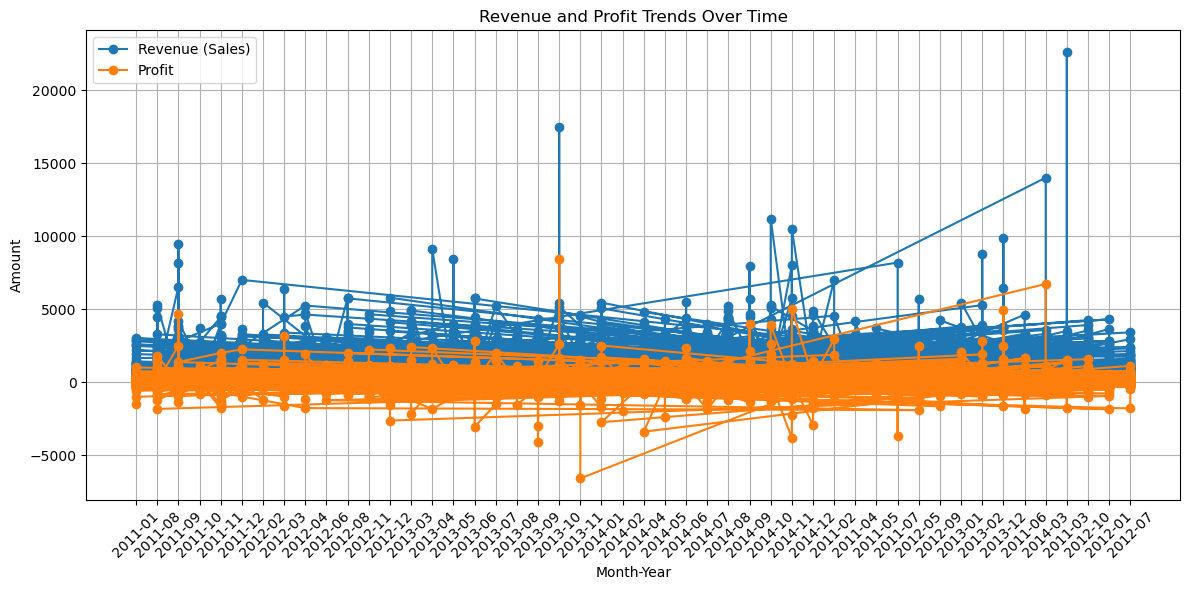

In [ ]:
# Revenue Trend
plt.figure(figsize=(12, 6))
plt.plot(sales_data["order_month_year"], sales_data["Sales"], marker="o", label="Revenue (Sales)")
plt.plot(sales_data["order_month_year"], sales_data["Profit"], marker="o", label="Profit")
plt.title("Revenue and Profit Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()